# Multicollinearity
- In statistical modeling, particularly in regression analysis, multicollinearity is a phenomenon that occurs when two or more independent variables (predictors) in a model are highly correlated with each other. This correlation can create significant problems when trying to understand the individual impact of each predictor on the dependent variable.   
- https://www.youtube.com/watch?v=ekuD8JUdL6M&t=50s



In [ ]:
import pandas as pd

df = pd.read_csv("D:\\utils\\DataSets\\home_prices.csv")
df

,locality,area_sqr_ft,price_lakhs,bedrooms
0,Kollur,656,39.0,2
1,Kollur,1260,83.2,2
2,Kollur,1057,86.6,3
3,Kollur,1259,59.0,2
4,Kollur,1800,140.0,3
5,Kollur,1325,80.1,2
6,Kollur,1085,116.0,3
7,Kollur,1110,45.0,2
8,Kollur,1700,100.0,3
9,Banjara Hills,1650,200.0,3


In [4]:
df_encoded = pd.get_dummies(df, columns=['locality'],drop_first=True)
import seaborn as sns
import matplotlib.pyplot as plt
df_encoded.sample(5)
df_encoded.columns[3:]

Index(['locality_Kollur', 'locality_Mankhal'], dtype='object')

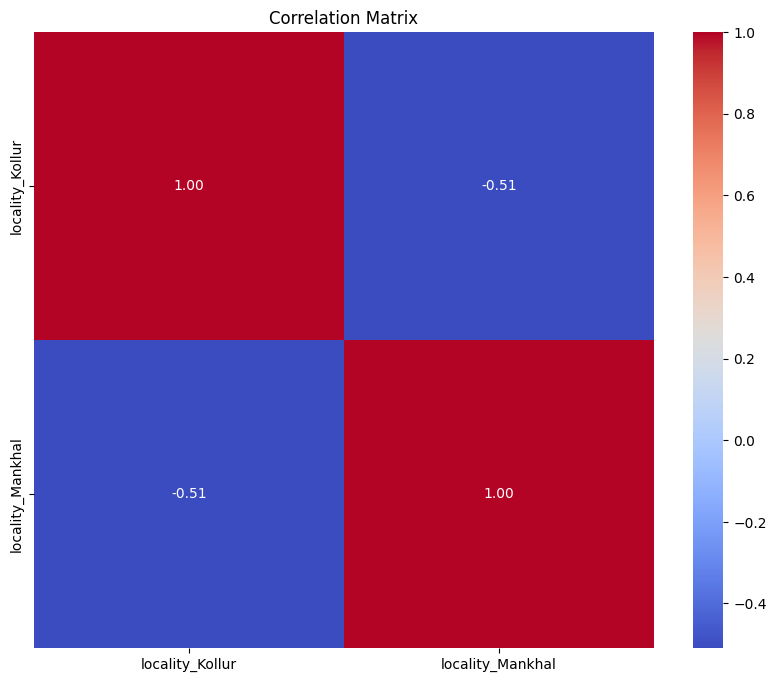

In [5]:
correlation_matrix = df_encoded[df_encoded.columns[3:]].corr()
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df_encoded.drop('price_lakhs', axis=1)
y = df_encoded['price_lakhs']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8558905263155381

In [7]:
test = pd.DataFrame([
    {'area_sqr_ft': 1600, "bedrooms": 2,"locality_Kollur": True, "locality_Mankhal": False},
    {'area_sqr_ft': 1600, "bedrooms": 2,"locality_Kollur": False, "locality_Mankhal": False},
])

model.predict(test)

array([113.96340695, 157.03383393])

## Polynomial Regression

Polynomial regression is a type of regression analysis that models the relationship between independent and dependent variables as an nth-degree polynomial. It's used when the relationship isn't linear but curved.

**Definition:**

Polynomial regression models non-linear relationships by fitting a polynomial curve to the data.

**Formula:**

- The general form of a polynomial regression equation of degree "n" is:
- y = β₀ + β₁x + β₂x² + β₃x³ + ... + βnxⁿ + ε


###### Where:

* `y` is the dependent variable.
* `x` is the independent variable.
* `β₀, β₁, β₂, ..., βn` are the coefficients.
* `n` is the degree of the polynomial.
* `ε` is the error term.

**Key Points:**

* It extends linear regression for curved relationships.
* The polynomial's "degree" controls curve complexity.
* Correct degree selection is vital to avoid overfitting.
* It's a linear regression because the coefficients are linear.

**In essence:**

Polynomial regression is used to model data with curved relationships, providing a better fit than simple linear regression.



In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

df=pd.read_csv("D:\\utils\\DataSets\\Employee_Salary_Dataset.csv")
df.head()

,ID,Experience_Years,Salary
0,1,10,10000000
1,2,9,9300000
2,3,8,7900000
3,4,7,7600000
4,5,6,6845000


In [9]:
df.dropna(inplace=True)
df.isnull().sum()


ID                  0
Experience_Years    0
Salary              0
dtype: int64

Text(0.5, 0, 'Years of Experience')

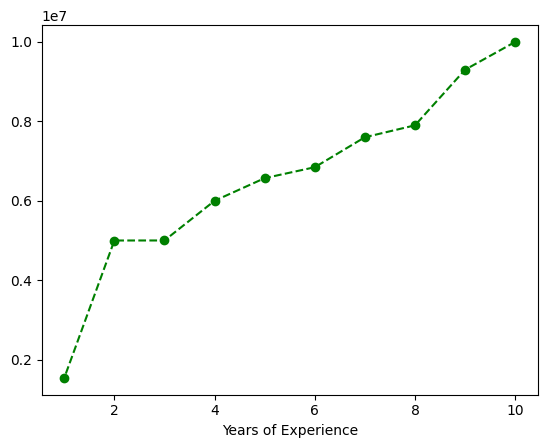

In [10]:
plt.plot(df['Experience_Years'],df['Salary'],marker='o',linestyle='--',color='g')
plt.xlabel('Years of Experience')   

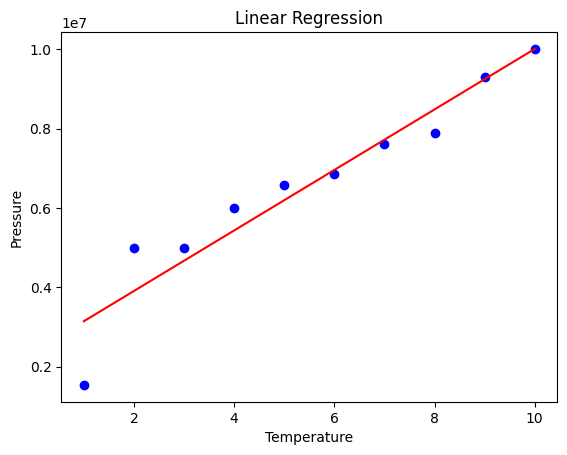

In [11]:
# Features and the target variables
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X, y)


# Visualising the Linear Regression results
plt.scatter(X, y, color='blue')

plt.plot(X, lin.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()

In [12]:



from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = lin.predict(X)


mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
mse, r2




(471131982096.97003, 0.9105592470575833)

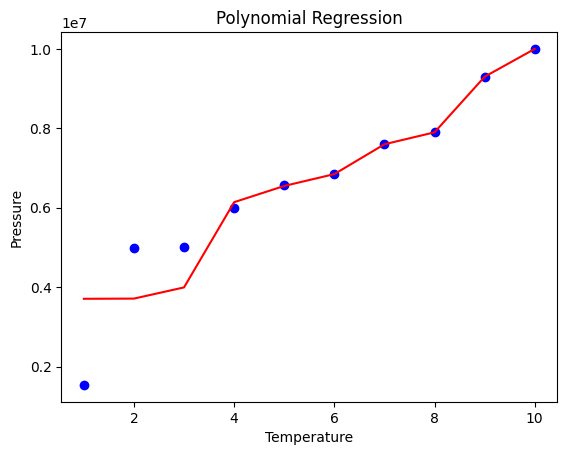

In [13]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=20)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)


# Visualising the Polynomial Regression results
plt.scatter(X, y, color='blue')

plt.plot(X, lin2.predict(poly.fit_transform(X)),
		color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')

plt.show()


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = lin2.predict(poly.fit_transform(X))
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
mse, r2

(739099773595.6852, 0.8596876400626912)

In [15]:
# R2 is better in polynomial regression 

# Reasons for Model Overfitting and Underfitting

## Overfitting
Overfitting occurs when a machine learning model learns the noise or random fluctuations in the training data instead of the actual patterns. This results in a model that performs well on the training data but poorly on unseen test data. Common causes of overfitting include:

### Reasons for Overfitting:
1. **Too Complex Model**: Using a model with too many parameters, such as a deep neural network with excessive layers or nodes.
2. **Insufficient Training Data**: When there isn't enough data to capture the true patterns, the model memorizes the training data instead.
3. **Too Many Features**: Including irrelevant or excessive features can cause the model to memorize noise in the data.
4. **Long Training Time**: Training the model for too many epochs can cause it to learn the fine details of the training data, including noise and outliers.
5. **Low Regularization**: Insufficient regularization techniques (like L1 or L2 regularization) can result in the model becoming too flexible and overfitting the training data.

### Signs of Overfitting:
- High accuracy on the training data, but low accuracy on the test data.
- Complex model with a large number of parameters relative to the data.

---

## Underfitting
Underfitting happens when a model is too simple to capture the underlying patterns in the data. It fails to learn the true relationships and results in poor performance both on the training data and the test data.

### Reasons for Underfitting:
1. **Too Simple Model**: Using a model that is too simple (e.g., a linear regression model for a problem that requires a nonlinear approach).
2. **Insufficient Training Time**: Not training the model long enough for it to learn the underlying patterns in the data.
3. **Too Few Features**: Excluding relevant features or using an overly simplified set of features can prevent the model from learning properly.
4. **Over-regularization**: Excessive regularization can make the model too rigid, preventing it from capturing the underlying patterns.
5. **Poor Data Representation**: If the data is not well-preprocessed or lacks important information, the model may struggle to learn effectively.

### Signs of Underfitting:
- Poor performance on both the training and test datasets.
- The model may be too simple or too rigid to capture meaningful patterns.

---

## Balancing Overfitting and Underfitting
- **Cross-validation**: Helps in assessing the model's performance and finding the right balance.
- **Regularization**: Techniques like L1, L2 regularization can prevent overfitting while allowing the model to learn general patterns.
- **Model Selection**: Choosing the right model complexity for the given data (not too simple, not too complex).
- **Hyperparameter Tuning**: Adjusting parameters like the learning rate, batch size, or model architecture can help avoid both overfitting and underfitting.

- **Feature Engineering**


# Lasso and Ridge Regression

- Lasso (Least Absolute Shrinkage and Selection Operator) and Ridge Regression are both regularization techniques used to prevent overfitting in linear regression models. They modify the cost function of the standard linear regression by adding penalty terms.

# Ridge Regression

Ridge Regression is a type of linear regression that incorporates **L2 regularization** to prevent overfitting by adding a penalty on the size of the coefficients. Unlike Lasso Regression, which can shrink some coefficients to zero, Ridge Regression tends to shrink all coefficients, but rarely sets any of them exactly to zero. This makes it useful when you have many small/medium-sized effects spread across a large number of features.

---

## **Key Concept**

The primary idea behind Ridge Regression is to add a regularization term to the linear regression cost function to penalize large coefficients. This helps in reducing model complexity and improving generalization, especially when the model is prone to overfitting.

---

## **Cost Function of Ridge Regression**

In linear regression, the cost function is typically the **Mean Squared Error (MSE)**. For Ridge Regression, we modify it by adding an L2 regularization term:

\[
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^{n} \theta_j^2
\]

Where:
- \( J(\theta) \) is the cost function.
- \( m \) is the number of training examples.
- \( y_i \) is the actual target value for the i-th example.
- \( \hat{y}_i \) is the predicted value for the i-th example.
- \( \theta_j \) are the coefficients (model parameters).
- \( \lambda \) is the regularization parameter, controlling the strength of the penalty.

---

## **L2 Penalty**

The L2 penalty term is the sum of the squares of the coefficients:  
\(\lambda \sum_{j=1}^{n} \theta_j^2\)

This penalty:
- Shrinks the coefficients towards zero.
- Encourages smaller coefficients but does not necessarily set them to zero.

---

## **Key Features of Ridge Regression**

1. **Prevents Overfitting**: By adding a penalty term, Ridge Regression helps in controlling the model complexity and reducing overfitting, especially when the dataset has many features or the features are highly correlated.
   
2. **Shrinkage**: Ridge shrinks the coefficients of features, reducing their impact without eliminating them. This is useful when every feature is believed to contribute to the outcome in some way.

3. **Works Well with Multicollinearity**: Ridge Regression is effective when the features are highly correlated (multicollinearity). It prevents the model from assigning large weights to correlated features, thus stabilizing the estimates.

---

## **Advantages of Ridge Regression**

- **Prevents Overfitting**: The penalty term reduces model complexity by shrinking the coefficients, helping to generalize better on unseen data.
- **Handles Multicollinearity**: Ridge is effective when features are highly correlated, as it stabilizes the coefficient estimates.
- **Retains All Features**: Unlike Lasso, Ridge keeps all features in the model, though it reduces the impact of less important ones.

---

## **Disadvantages of Ridge Regression**

- **No Feature Selection**: Ridge does not perform feature selection, meaning it keeps all features in the model, though some coefficients will be very small.
- **Bias**: While it reduces variance, Ridge can increase bias in the model because it doesn't allow coefficients to grow too large.
- **Model Complexity**: The model may still become too complex in the presence of too many features, as it doesn't eliminate any features entirely.

---

## **Choosing the Regularization Parameter (\( \lambda \))**

- The parameter \( \lambda \) controls the strength of the regularization. 
- A higher value of \( \lambda \) increases the penalty on large coefficients, leading to more shrinkage and possibly underfitting the model.
- A lower value of \( \lambda \) reduces the effect of regularization, and the model might overfit.

---

## **When to Use Ridge Regression**

- **Multicollinearity**: When there is multicollinearity (i.e., when the features are highly correlated), Ridge Regression can help stabilize the model by reducing the impact of these correlations.
- **Small-to-Medium-Sized Effects**: When you believe that all features contribute to the outcome but you want to shrink their influence to avoid overfitting.

---

## **Example Scenario**

Suppose you have a dataset with 100 features, some of which may be highly correlated. Without regularization, a standard linear regression model may overfit, giving large coefficients to correlated features. By applying Ridge Regression, the coefficients will be shrunk, preventing any single feature from dominating the model, and stabilizing the estimates.

---

## **Summary of Ridge Regression**

- **Objective**: Minimize prediction error while reducing the complexity of the model by adding a penalty term on the coefficients.
- **Key Benefit**: Prevents overfitting by shrinking the coefficients, but doesn't eliminate any features entirely.
- **Penalty**: L2 norm, which penalizes the sum of the squared coefficients.
- **Suitable for**: Cases with multicollinearity or when every feature is believed to contribute to the outcome.




### Cost Function for Ridge Regression:
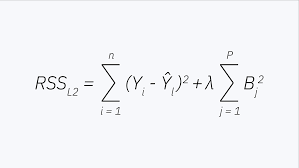

# Lasso Regression

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that incorporates **L1 regularization** to prevent overfitting by shrinking the coefficients of the model. It works by adding a penalty to the cost function that is proportional to the absolute value of the coefficients. This technique has the added benefit of performing **feature selection**, as it can set some coefficients exactly to zero, effectively removing irrelevant features from the model.

---

## **Key Concept**

The main idea behind Lasso is to add a regularization term to the linear regression cost function to reduce the complexity of the model and avoid overfitting.

---

## **Cost Function of Lasso Regression**

In linear regression, the cost function is typically the **Mean Squared Error (MSE)**. For Lasso regression, we modify it by adding an L1 regularization term:

\[
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^{n} |\theta_j|
\]

Where:
- \( J(\theta) \) is the cost function.
- \( m \) is the number of training examples.
- \( y_i \) is the actual target value for the i-th example.
- \( \hat{y}_i \) is the predicted value for the i-th example.
- \( \theta_j \) are the coefficients (model parameters).
- \( \lambda \) is the regularization parameter, controlling the strength of the penalty.

---

## **L1 Penalty**

The L1 penalty term is the sum of the absolute values of the model's coefficients:  
\(\lambda \sum_{j=1}^{n} |\theta_j|\)

This penalty:
- Shrinks the coefficients towards zero.
- Encourages sparsity in the model (some coefficients become exactly zero).

---

## **Key Features of Lasso Regression**

1. **Feature Selection**: One of the most significant advantages of Lasso is that it can set some coefficients to zero, effectively removing irrelevant or redundant features from the model. This makes it useful for high-dimensional datasets where feature selection is important.

2. **Regularization**: Like Ridge regression, Lasso adds a penalty to reduce model complexity and prevent overfitting, but it does so by using the L1 norm, which can result in sparse solutions (some coefficients being zero).

3. **Shrinkage**: Lasso shrinks the coefficients of less important features towards zero, which helps to reduce the variance and improve generalization of the model.

---

## **Advantages of Lasso Regression**

- **Feature Selection**: Automatically eliminates some features by setting their coefficients to zero.
- **Prevents Overfitting**: Regularization helps to avoid overfitting, especially in cases of a large number of features.
- **Simplicity**: Since it selects a subset of features, it can lead to simpler models, which are easier to interpret.

---

## **Disadvantages of Lasso Regression**

- **Bias**: Lasso can introduce bias into the model because it forces some coefficients to zero. This may reduce model variance but increase bias.
- **Model Sensitivity**: The performance of Lasso regression heavily depends on the regularization parameter \( \lambda \), which needs to be chosen carefully.

---

## **Choosing the Regularization Parameter (\( \lambda \))**

- The parameter \( \lambda \) controls the strength of the regularization. 
- A higher value of \( \lambda \) increases the penalty and may shrink more coefficients to zero, possibly underfitting the model.
- A lower value of \( \lambda \) reduces the effect of regularization, and the model might overfit.

---

## **When to Use Lasso Regression**

- **High-Dimensional Data**: When there are many features, especially when you believe only a few features are actually relevant, Lasso can help by selecting the most important ones.
- **Feature Selection Needed**: When you want to automatically remove irrelevant features and simplify the model.

---

## **Example Scenario**

Suppose you're working with a dataset that has 100 features, but you suspect that only 5 of them are truly important for predicting the target variable. Lasso regression will assign non-zero coefficients to only the 5 relevant features, and set the remaining 95 coefficients to zero, effectively reducing the number of features in your model.

---

## **Summary of Lasso Regression**

- **Objective**: Minimize prediction error while reducing the complexity of the model.
- **Key Benefit**: Performs both regularization and feature selection by shrinking some coefficients to zero.
- **Penalty**: L1 norm, which penalizes the absolute values of coefficients.
- **Suitable for**: High-dimensional datasets where feature selection is important.


In [16]:
import pandas as pd

df = pd.read_csv("D:\\utils\\DataSets\\home_prices.csv")
df

,locality,area_sqr_ft,price_lakhs,bedrooms
0,Kollur,656,39.0,2
1,Kollur,1260,83.2,2
2,Kollur,1057,86.6,3
3,Kollur,1259,59.0,2
4,Kollur,1800,140.0,3
5,Kollur,1325,80.1,2
6,Kollur,1085,116.0,3
7,Kollur,1110,45.0,2
8,Kollur,1700,100.0,3
9,Banjara Hills,1650,200.0,3


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge


X = df_encoded.drop('price_lakhs', axis=1)
y = df_encoded['price_lakhs']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8558905263155381

In [ ]:
#These 2 only need to be used when model is overfitting

model_lasso = Lasso(alpha=0.3)
model_lasso.fit(X_train, y_train)
model_lasso.score(X_test, y_test)

0.8549551597749123

In [32]:
model_ridge = Ridge(alpha=0.3)
model_ridge.fit(X_train, y_train)
model_ridge.score(X_test, y_test)

0.8532983933372599